In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [40]:
df = pd.read_csv('datasetbayu.csv', sep=";")
df.head(20)

,Customer,Tanggal,Invoice,Nama_barang,Qty,Harga,Satuan,Jumlah,Negara
0,bapak kadir,05/11/2015,883.0,botol yardle 60ml nat,3075.0,825.0,pcs,Rp2.536.875,Indonesia
1,bapak kadir,05/11/2015,883.0,pot cream 12.5gr pp putih lg,1180.0,1150.0,pcs,Rp1.357.000,Indonesia
2,bapak kadir,05/11/2015,883.0,botol dks 30ml nat,1400.0,725.0,pcs,Rp1.015.000,Indonesia
3,bapak kadir,05/11/2015,883.0,pot apel 12.5gr pink lg,2700.0,1300.0,pcs,Rp3.510.000,Indonesia
4,bapak kadir,05/11/2015,883.0,botolputri 100ml nat,50.0,1150.0,pcs,Rp57.500,Indonesia
5,bapak andri,15/11/2015,904.0,botol dks 30ml nat,2800.0,700.0,pcs,Rp1.960.000,Indonesia
6,pt sumber kemas wangi,28/11/2015,943.0,botol pet 250ml neck 24 natur beauty,4000.0,1525.0,pcs,Rp6.100.000,Indonesia
7,pt pct kemasindo,28/11/2015,899.0,pot cream 12.5gr pp putih lg,8640.0,1150.0,pcs,Rp9.936.000,Indonesia
8,pt pct kemasindo,28/11/2015,899.0,botol yardle 100ml tutup sprayer,3040.0,1715.0,pcs,Rp5.213.600,Indonesia
9,bapak andri,01/12/2015,865.0,pot cream 12.5gr pp putih lg,5940.0,1125.0,pcs,Rp6.682.500,Indonesia


In [3]:
df.dropna(axis=0,how='any',subset=['Satuan'],inplace=True)
df['Customer']=df['Customer'].str.strip()
df.dropna(axis=0,subset=['Customer'],inplace=True)
df['Customer']=df['Customer'].astype('str')
df=df[~df['Customer'].str.contains('C')]

In [37]:
basket=(df[df['Negara']=="Indonesia"]
        .groupby(['Customer','Nama_barang'])['Qty']
        .sum().unstack().reset_index()
        .fillna(0).set_index('Customer'))
basket.head()

Nama_barang,Body Lotion 250gr putih,Botol 1L nat,Btl. 250ml Putih,Btl. BR 100ml Clear,Btl. BR 250ml Clear,Btl. DKS 30ml,Btl. Scarlate 300ml Clear,Cap Fliptop N 24,Cap Fliptop N 24 Putih,Pot Arasta,...,treatment pump n 18 putih,treatment pump n 24 putih,treatment pump n18 putih + botol,treatment pump neck 18,treatment pump neck 18 nat,treatment pump neck 18 putih,treatment pump neck 18/410,treatment pump putih,tutup amortisasi,tutup botol tetes 15ml hitam
Customer,,,,,,,,,,,,,,,,,,,,,
Ibu Atin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ibu Lupita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ibu Nidia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apotik global health,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.head()

Nama_barang,Body Lotion 250gr putih,Botol 1L nat,Btl. 250ml Putih,Btl. BR 100ml Clear,Btl. BR 250ml Clear,Btl. DKS 30ml,Btl. Scarlate 300ml Clear,Cap Fliptop N 24,Cap Fliptop N 24 Putih,Pot Arasta,...,treatment pump n 18 putih,treatment pump n 24 putih,treatment pump n18 putih + botol,treatment pump neck 18,treatment pump neck 18 nat,treatment pump neck 18 putih,treatment pump neck 18/410,treatment pump putih,tutup amortisasi,tutup botol tetes 15ml hitam
Customer,,,,,,,,,,,,,,,,,,,,,
Ibu Atin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ibu Lupita,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Ibu Nidia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rudy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apotik global health,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets.head(4000)

,support,itemsets
0,0.081218,(botol 100ml clear)
1,0.020305,(botol 100ml hitam)
2,0.055838,(botol 100ml putih)
3,0.020305,(botol 1L nat)
4,0.045685,(botol 200ml clear)
...,...,...
3239,0.020305,"(pot pomade 50gr putih, pot exsotika 30gr puti..."
3240,0.020305,"(pot pomade 50gr putih, pot exsotika 30gr puti..."
3241,0.020305,"(pot pomade 50gr putih, pot exsotika 30gr puti..."
3242,0.020305,"(pot apel 12.5gr mutiara, pot pomade 50gr puti..."


In [61]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules.head(100000000)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(botol 100ml putih),(botol 100ml clear),0.055838,0.081218,0.035533,0.636364,7.835227,0.030998,2.526650
1,(botol 250ml putih),(botol 100ml clear),0.030457,0.081218,0.020305,0.666667,8.208333,0.017831,2.756345
2,(botol br 250ml putih),(botol 100ml clear),0.030457,0.081218,0.020305,0.666667,8.208333,0.017831,2.756345
3,(botol round 100ml putih),(botol 100ml clear),0.030457,0.081218,0.020305,0.666667,8.208333,0.017831,2.756345
4,(botol round 250ml putih),(botol 100ml clear),0.025381,0.081218,0.020305,0.800000,9.850000,0.018243,4.593909
...,...,...,...,...,...,...,...,...,...
81766,"(pot exotika 30gr putih ls, pot apel 12.5gr mu...","(pot pomade 50gr hitam, pot exsotika 30gr puti...",0.030457,0.020305,0.020305,0.666667,32.833333,0.019686,2.939086
81767,"(pot cream 12.5gr pp putih lg, pot exotika 30g...","(botol putri 100ml nat, pot pomade 50gr hitam,...",0.025381,0.020305,0.020305,0.800000,39.400000,0.019789,4.898477
81768,"(botol yardle 60ml nat, pot exotika 30gr putih...","(botol putri 100ml nat, pot pomade 50gr hitam,...",0.030457,0.020305,0.020305,0.666667,32.833333,0.019686,2.939086
81769,"(pot exotika 30gr putih ls, botol putri 100ml ...","(pot pomade 50gr hitam, pot exsotika 30gr puti...",0.030457,0.020305,0.020305,0.666667,32.833333,0.019686,2.939086


c:\users\bayuc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\bayuc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


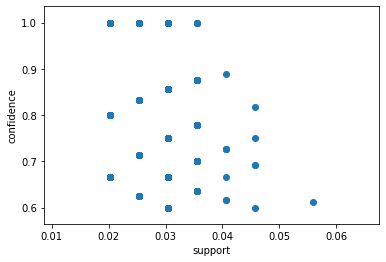

In [62]:
support = rules.as_matrix(['support'])
confidence = rules.as_matrix(['confidence'])
plt.scatter(support,confidence,alpha=1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [47]:
df.dropna(axis=0,how='any',subset=['Satuan'],inplace=True)
df['Nama_barang'] = df['Nama_barang'].str.strip()
df.dropna(axis=0, subset=['Invoice'], inplace=True)
df['Invoice'] = df['Invoice'].astype('str')
df = df[~df['Invoice'].str.contains('C')]

In [17]:
rules[
    (rules['support'] >= 50) &
       (rules['confidence'] >= 1)]
rules.head(100000)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(botol 100ml putih),(botol 100ml clear),0.055838,0.081218,0.035533,0.636364,7.835227,0.030998,2.526650
1,(botol 250ml putih),(botol 100ml clear),0.030457,0.081218,0.020305,0.666667,8.208333,0.017831,2.756345
2,(botol br 250ml putih),(botol 100ml clear),0.030457,0.081218,0.020305,0.666667,8.208333,0.017831,2.756345
3,(botol round 100ml putih),(botol 100ml clear),0.030457,0.081218,0.020305,0.666667,8.208333,0.017831,2.756345
4,(botol round 250ml putih),(botol 100ml clear),0.025381,0.081218,0.020305,0.800000,9.850000,0.018243,4.593909
...,...,...,...,...,...,...,...,...,...
81766,"(pot apel 12.5gr pp putih lg, pot exotika 30gr...","(pot exsotika 30gr putih ls, pot pomade 50gr p...",0.025381,0.020305,0.020305,0.800000,39.400000,0.019789,4.898477
81767,"(botol yardle 60ml nat, pot exotika 30gr putih...","(pot exsotika 30gr putih ls, pot pomade 50gr p...",0.030457,0.020305,0.020305,0.666667,32.833333,0.019686,2.939086
81768,"(pot apel 12.5gr mutiara lg, pot exotika 30gr ...","(pot exsotika 30gr putih ls, pot pomade 50gr p...",0.030457,0.020305,0.020305,0.666667,32.833333,0.019686,2.939086
81769,"(botol putri 100ml nat, pot exotika 30gr putih...","(pot exsotika 30gr putih ls, pot pomade 50gr p...",0.030457,0.020305,0.020305,0.666667,32.833333,0.019686,2.939086


In [ ]:
rules[
    [rules (association_rules(frequent_itemsets, matrix['lift'], min_threshold=0.6))]
    and [rules (association_rules(frequent_itemsets, matrix['confidence'], min_threshold=0.5))]
]
rules.head()